# Zadanie 1: metoda gradientu prostego

## Import bibliotek

In [8]:
# %matplotlib ipympl
from wsilib.algorithms.gradient_descent.gradient_descent import (
    GradientDescentFunction as Function,
    GradientDescentSolver as Solver,
    GradientDescentStopConditions as StopConditions
)
from wsilib.utils.domain import Domain
from src.plotting import plot_function
from src.experiments import single_experiment, experiment_step_sizes
import autograd.numpy as np

## Definicja funkcji celu i obliczanie gradientów
Gradienty funkcji obliczam za pomocą biblioteki autograd. Jak widać są one bardzo zblione do tych obliczonych analitycznie.

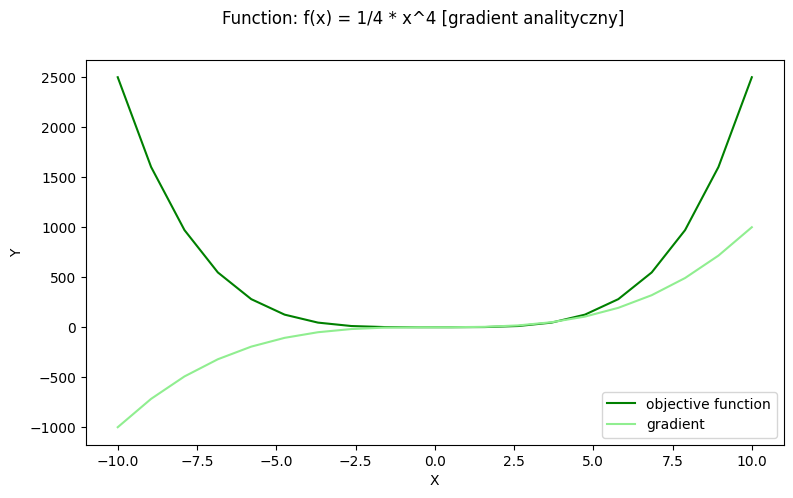

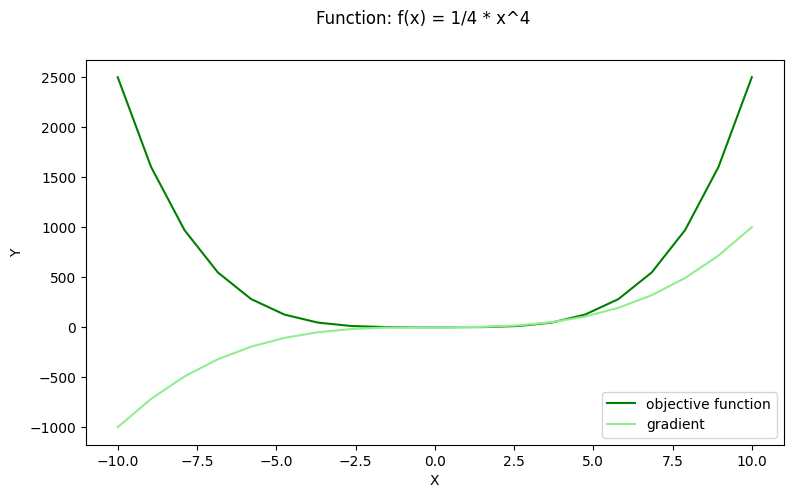

In [9]:
domain_1 = Domain(x = np.linspace(-10, 10, 20))

objective_function_1_given_grad = Function(
  f= lambda x: (1/4)*x**4, 
  gradient= lambda x: np.array(x**3),
  dim=1,
  name="f(x) = 1/4 * x^4 [gradient analityczny]"
)
objective_function_1 = Function(
  f= lambda x: (1/4)*x**4, 
  dim=1,
  name="f(x) = 1/4 * x^4"
)

plot_function(objective_function_1_given_grad, domain=domain_1)
plot_function(objective_function_1, domain=domain_1)


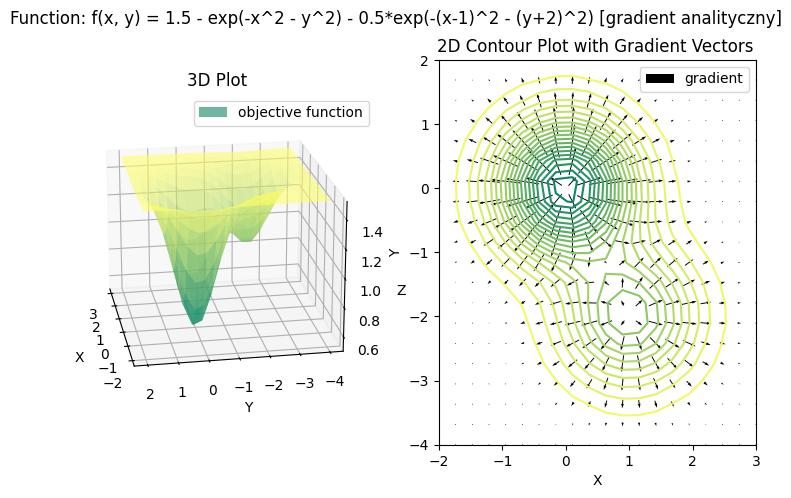

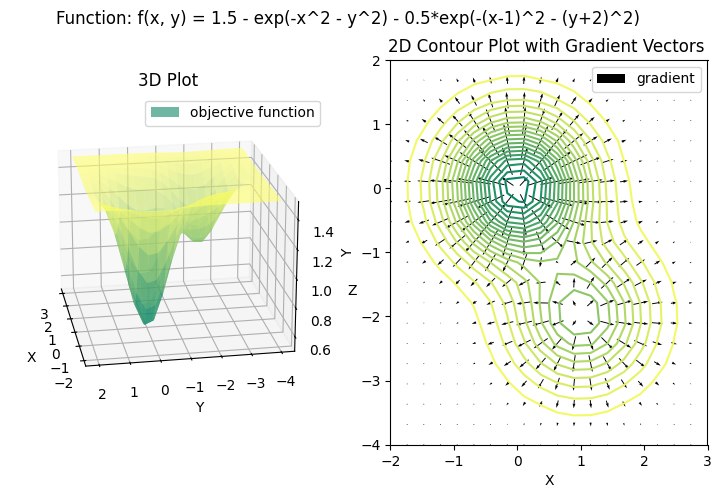

In [10]:
domain_2 = Domain(x = np.linspace(-2, 3, 20), y=np.linspace(-4, 2, 20))

objective_function_2_given_grad = Function(
  f=lambda x: 1.5 - np.exp(-x[0]**2 - x[1]**2) - 0.5*np.exp(-(x[0]-1)**2 - (x[1]+2)**2),
  gradient=lambda x: np.array([2*x[0]*np.exp(-x[0]**2 - x[1]**2) + (x[0]-1)*np.exp(-(x[0]-1)**2 - (x[1]+2)**2), 2*x[1]*np.exp(-x[0]**2 - x[1]**2) + (x[1]+2)*np.exp(-(x[0]-1)**2 - (x[1]+2)**2)]),
  dim=2,
  name="f(x, y) = 1.5 - exp(-x^2 - y^2) - 0.5*exp(-(x-1)^2 - (y+2)^2) [gradient analityczny]"
)
objective_function_2 = Function(
  f=lambda x: 1.5 - np.exp(-x[0]**2 - x[1]**2) - 0.5*np.exp(-(x[0]-1)**2 - (x[1]+2)**2),
  dim=2,
  name="f(x, y) = 1.5 - exp(-x^2 - y^2) - 0.5*exp(-(x-1)^2 - (y+2)^2)"
)


plot_function(objective_function_2_given_grad, domain=domain_2)
plot_function(objective_function_2, domain=domain_2)


## Przykładowy eksperyment dla losowych punktów startowych

GradientDescentIteration(n_iter=0, time_running=0.0021, x=array([0.52631579]), f_value=0.019183400986793997, gradient_value=array([0.14579385]))
GradientDescentIteration(n_iter=8700, time_running=1.0001, x=array([0.02860386]), f_value=1.6735507048290457e-07, gradient_value=array([2.3403141e-05]))


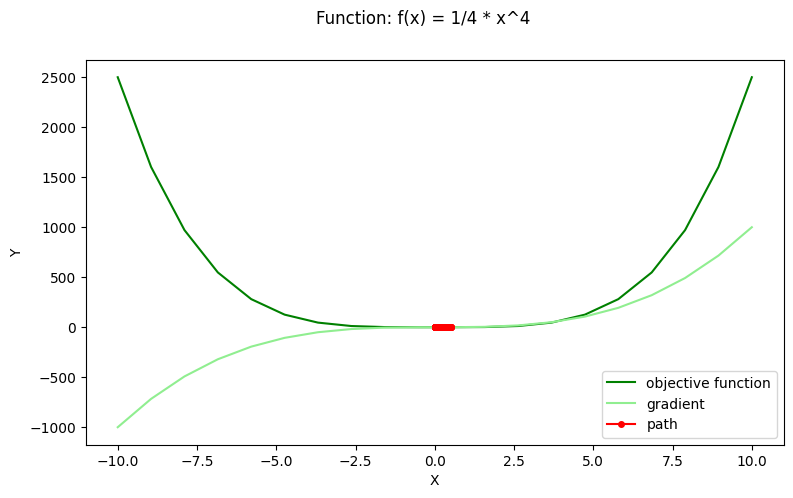

GradientDescentResult(n_iter=27820, time_running=2.0, x=array([0.01601457]), stop_condition='max_time(2)', f_value=1.6443762924516807e-08, gradient_value=array([4.10720045e-06]))




In [11]:
s1 = Solver(
  step_size=0.07,
  stop_conditions=[
    StopConditions.max_time(2),
  ]
)
single_experiment(objective_function_1, domain_1, s1, log=True)

# Można też zdefiniować stały punkt startowy
# single_experiment(objective_function_1, domain_1, s1, log=True, starting_point=np.array([5.]))

GradientDescentIteration(n_iter=0, time_running=0.0013, x=array([ 2.21052632, -0.21052632]), f_value=1.4880814577239991, gradient_value=array([0.04329762, 0.01377143]))
GradientDescentIteration(n_iter=3310, time_running=1.0001, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([ 2.08166817e-17, -4.16333634e-17]))
GradientDescentIteration(n_iter=8166, time_running=2.0003, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([ 2.08166817e-17, -4.16333634e-17]))
GradientDescentIteration(n_iter=12999, time_running=3.0001, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([ 2.08166817e-17, -4.16333634e-17]))
GradientDescentIteration(n_iter=17669, time_running=4.0001, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([ 2.08166817e-17, -4.16333634e-17]))
GradientDescentIteration(n_iter=22424, time_running=5.0001, x=array([ 0.00347601, -0.00695203]), f_va

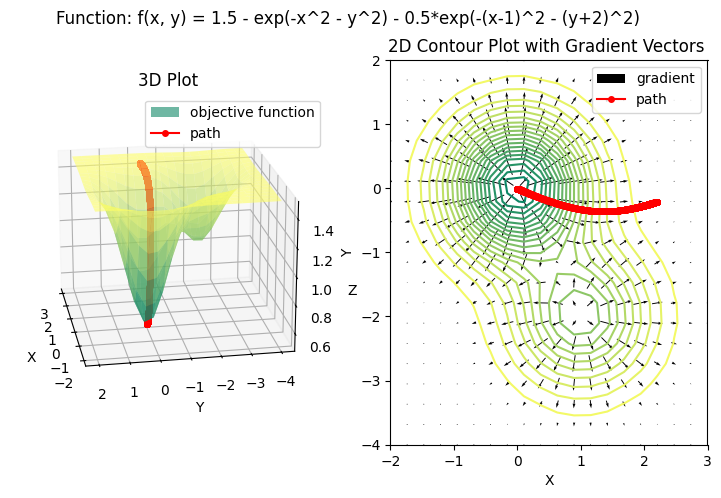

GradientDescentResult(n_iter=22424, time_running=5.0001, x=array([ 0.00347601, -0.00695203]), stop_condition='max_time(5)', f_value=0.4965724836763416, gradient_value=array([ 2.08166817e-17, -4.16333634e-17]))




In [12]:
s2 = Solver(
  stop_conditions=[
    StopConditions.max_time(5),
  ]
)
single_experiment(objective_function_2, domain_2, s2, log=True)

## Eksperyment dla różnych rozmiarów kroku i losowych punktów startowych

Generating starting points...
Starting points:  [array([-5.78947368]), array([6.84210526]), array([8.94736842]), array([-3.68421053]), array([8.94736842]), array([10.]), array([10.]), array([-6.84210526]), array([-7.89473684]), array([4.73684211])]


(1/320) [00:00] step_size=0.005 max_time(5) min_gradient(1e-06) starting_point=[-5.78947368]
GradientDescentIteration(n_iter=0, time_running=0.0004, x=array([-5.78947368]), f_value=280.86417384765315, gradient_value=array([-194.05161102]))
GradientDescentIteration(n_iter=7117, time_running=1.0001, x=array([-0.1184619]), f_value=4.9232819985685694e-05, gradient_value=array([-0.0016624]))
GradientDescentIteration(n_iter=27894, time_running=2.0001, x=array([-0.05986417]), f_value=3.2107608603977507e-06, gradient_value=array([-0.00021454]))
GradientDescentIteration(n_iter=47805, time_running=3.0001, x=array([-0.04573158]), f_value=1.0934649409744742e-06, gradient_value=array([-9.56419982e-05]))
GradientDescentIteration(n_iter=67364, time_runni

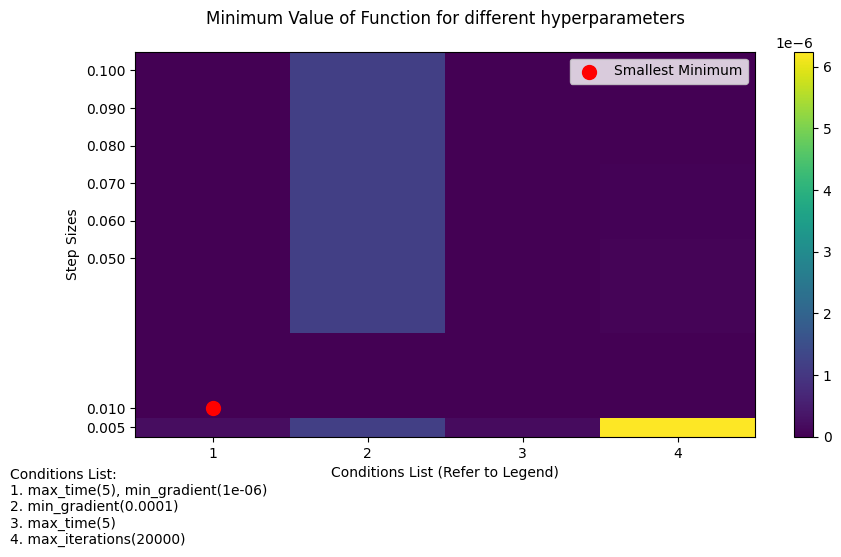

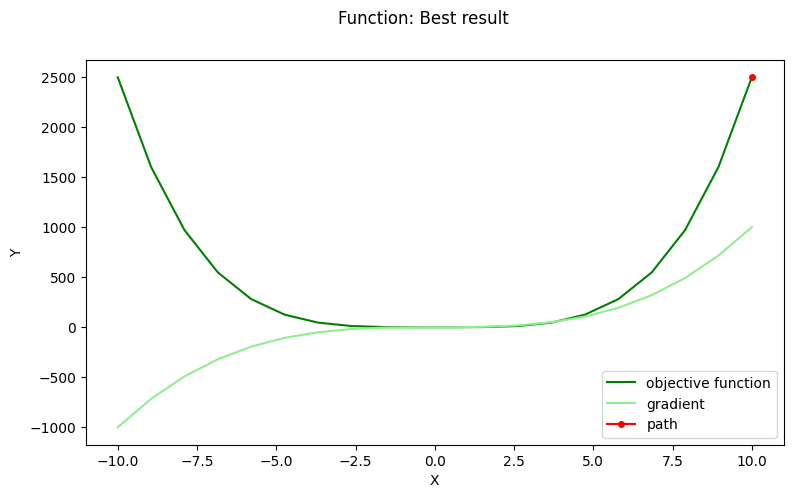

GradientDescentResult(n_iter=1, time_running=0.0003, x=array([0.]), stop_condition='min_gradient(1e-06)', f_value=0.0, gradient_value=array([0.]))


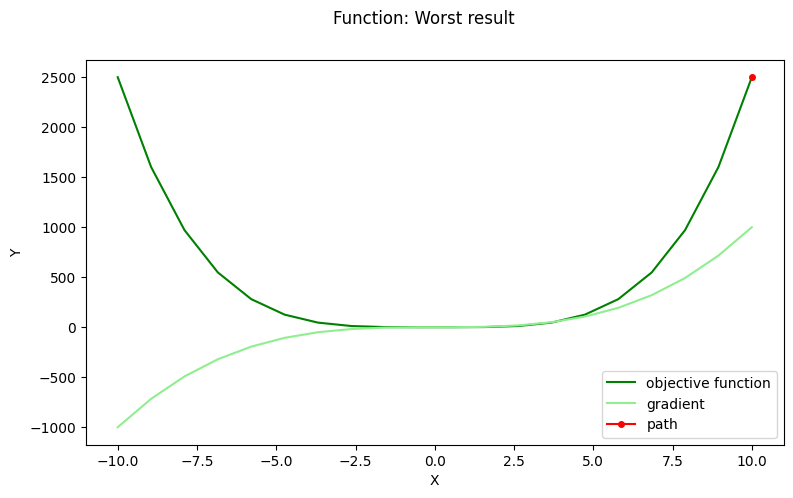

GradientDescentResult(n_iter=1, time_running=0.0002, x=array([-90.]), stop_condition='X_OUT_OF_DOMAIN', f_value=16402500.0, gradient_value=array([-729000.]))


In [13]:
step_sizes_1 = [0.005, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
conditions_1 = [
  [StopConditions.max_time(5), StopConditions.min_gradient(1e-6)],
  [StopConditions.min_gradient(1e-4)],
  [StopConditions.max_time(5)],
  [StopConditions.max_iterations(20000)]
]
experiment_step_sizes(objective_function_1, domain_1, step_sizes_1, conditions_1, n_starting_points=10)

Generating starting points...
Starting points:  [array([ 0.63157895, -0.21052632]), array([2.47368421, 0.10526316]), array([-0.68421053,  0.10526316]), array([-1.47368421, -3.36842105]), array([0.10526316, 1.05263158]), array([2.47368421, 0.73684211]), array([ 2.73684211, -2.42105263]), array([-0.15789474, -0.52631579]), array([-0.68421053, -3.36842105]), array([2.21052632, 2.        ])]


(1/320) [00:00] step_size=0.005 max_time(5) min_gradient(1e-06) starting_point=[ 0.63157895 -0.21052632]
GradientDescentIteration(n_iter=0, time_running=0.0013, x=array([ 0.63157895, -0.21052632]), f_value=0.8402749009220171, gradient_value=array([ 0.79782729, -0.20675964]))
GradientDescentResult(n_iter=1455, time_running=0.6271, x=array([ 0.00347644, -0.00695231]), stop_condition='min_gradient(1e-06)', f_value=0.49657248367659573, gradient_value=array([ 8.41614847e-07, -5.34155712e-07]))


(2/320) [00:48] step_size=0.005 max_time(5) min_gradient(1e-06) starting_point=[2.47368421 0.10526316]
Gradient

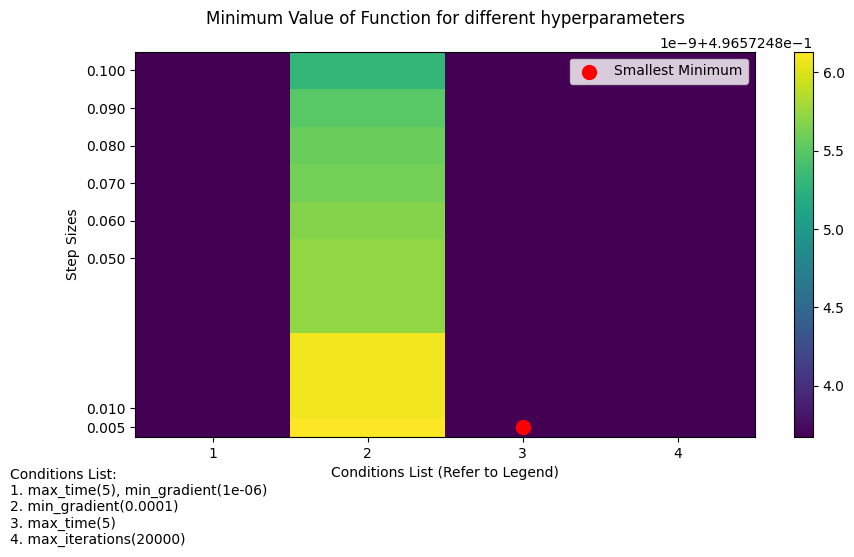

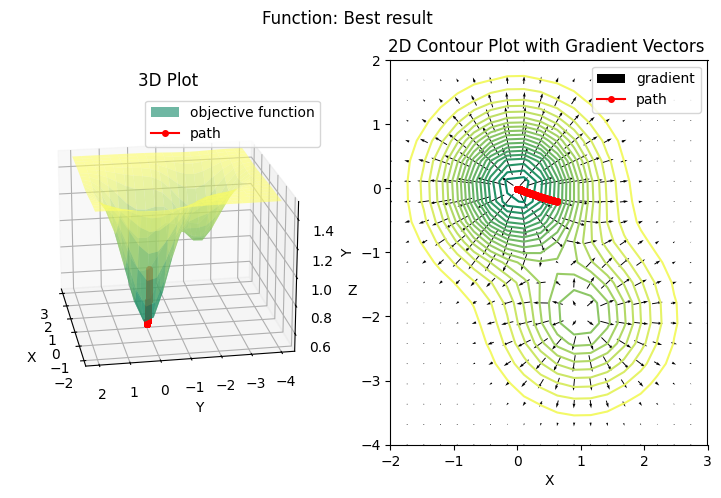

GradientDescentResult(n_iter=25393, time_running=5.0, x=array([ 0.00347601, -0.00695203]), stop_condition='max_time(5)', f_value=0.4965724836763416, gradient_value=array([ 4.33680869e-17, -8.67361738e-17]))


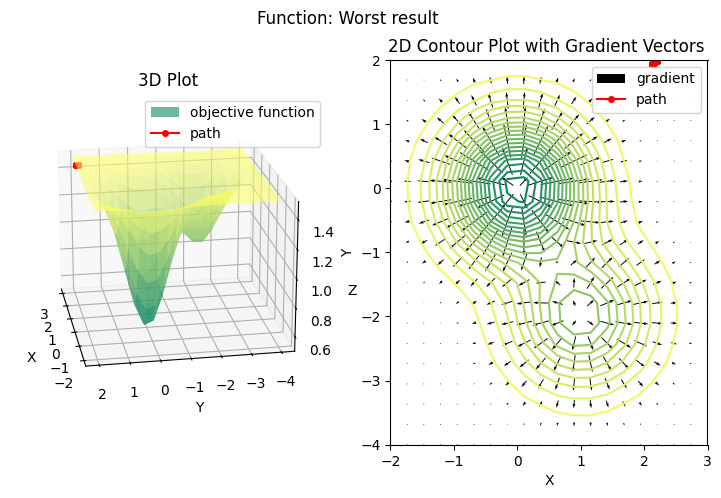

GradientDescentResult(n_iter=20000, time_running=3.9899, x=array([2.1287997 , 1.92604607]), stop_condition='max_iterations(20000)', f_value=1.4997364676168319, gradient_value=array([0.00112196, 0.00101526]))


In [14]:
step_sizes_2 = [0.005, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
conditions_2 = [
  [StopConditions.max_time(5), StopConditions.min_gradient(1e-6)],
  [StopConditions.min_gradient(1e-4)],
  [StopConditions.max_time(5)],
  [StopConditions.max_iterations(20000)]
]
experiment_step_sizes(objective_function_2, domain_2, step_sizes_2, conditions_2, n_starting_points=10)

## Wyniki i wnioski

Powyższe eksperymenty pozwoliły mi wyznaczyć minimalne wartości obu funkcji i ich argumenty (wartość x i f_value pod wykresem "Best result"). Są one bardzo bliskie faktycznych wartości wyznaczonych analitycznie.

### Przebieg eksperymentu
Dla obu funkcji przetestowałem 32 konfiguracje parametrów (8 rozmiarów kroków * 4 zestawy warunków stopu) dla 10 losowo wyznaczanych punktów z wybranej dziedziny (zawierającej minumum).

### Funckja 1
#### Rozmiar kroku
Przetestowałem 8 rozmiarów kroku [0.005, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1] które początkowo wyznaczyłem *empirycznie* jako potencjalnie dobre. Większe rozmiary kroku na ogół nie doprowadzały do zbieżności, a mniejsze nie dawały lepszych wyników. Stąd wytypowałem właśnie te wartości

Okazało się, że dla funkcji 1 najlepsze wyniki uzyskałem dla rozmiaru kroku 0.1. Dla niektórych punktów startowych był on za duży i powodował *przestrzelenie* minimum i wypadnięcie z dziedziny. Jednak przy 10-krotnym powtórzeniu eksperymentu dla losowych punktów startowych ten rozmiar kroku dostarczył najlepsze wyniki. 
Warto zaznaczyć, że inne rozmiary skoku dawały bardzo podobne wyniki. Mniejsze rozmiary kroku dawały na ogół nieznacznie gorsze wyniki w sensonym czasie działania (prawdopodobnie byłyby one lepsze gdyby zwiększyć liczbę iteracji. Niestety już w obecnej konfiguracji eksperyment zajmuje 30 minut na moim komputerze).

#### Warunki stopu
Postanowiłem również zbadać wpływ warunków stopu na wyniki. Przetestowałem 4:
1. max_time(5) lub min_gradient(1e-6)
2. min_gradient(1e-4)
3. max_time(5)
4. max_iterations(20000)

Wyniki dla warunków 1, 3 i 4 były bardzo zbliżone (najlepsze dla 3) dlatego nie pozwalają na wyciągnięcie wartościowych wniosków. Natomiast warunek 2 znacząco pogorszył działanie algorytmu, zatrzymując go zanim znajdzie minimum (wniosek - należy przyjmować mniejsze minimalne wartości gradientu niż 1e-4). Przy małych rozmiarach kroku podobne zjawisko zachodziło dla warunku 4.

### Funckja 2
#### Rozmiar kroku
Dla funkcji 2 zbadałem te same potencjalne rozmiary kroku. W tym przypadku znowu przy 10-krotnym wywołaniu prezentowały się one bardzo podobnie, jednak najlepsze wyniki uzyskałem dla najmniejszego rozmiaru kroku - 0.05. Dla większości warunków rozmiar kroku nie miał większego znaczenia, jednak dla warunku 2 (min_gradient(1e-4)) okazał się kluczowy. Dla mniejszych rozmiarów kroku algorytm utykał w minimum lokalnym i nie był w stanie go opuścić. Widoczne jest to na wykresie "Worst result".

#### Warunki stopu
Przetestowałem te same warunki stopu co dla funkcji 1. Ponownie warunki 1, 3 i 4 nie różniły się znacząco (najlpeszy ponownie 3). Warunek 2 znacząco pogorszył wyniki (nawet bardziej niż dla funkcji 1), ponieważ powodował on utknięcie w minimum lokalnym.
